In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mnistdata.loader import MNIST
from classifier import n

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, 784], name='x')
py = n(x)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


In [5]:
mnist = MNIST('../MNIST')

In [6]:
mitem, nitem = 3, 4
x_batch, y_batch = mnist.next_batch(mitem*nitem)
py_batch = sess.run(py, {x: x_batch})
py_batch = np.argmax(py_batch, axis=1)

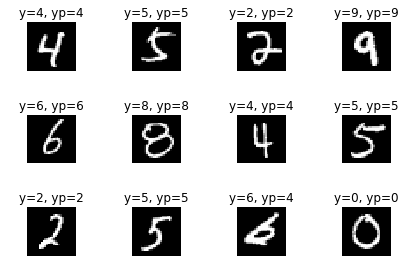

In [7]:
fig, axs = plt.subplots(mitem, nitem)
fi = 0
for i in range(mitem):
    for j in range(nitem):
        axs[i, j].imshow(x_batch[fi].reshape([28, 28]), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title('y={0}, yp={1}'.format(y_batch[fi], py_batch[fi]))
        fi += 1
fig.tight_layout()
plt.show()

In [8]:
with tf.variable_scope('n', reuse=tf.AUTO_REUSE):
    w = sess.run(tf.get_variable(
            'w',
            [784, 10],
            initializer=tf.initializers.zeros
    ))

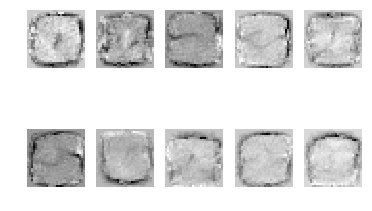

In [14]:
fig, axs = plt.subplots(2, 5)
fi = 0
for i in range(2):
    for j in range(5):
        ws = w[:, fi].reshape([28, 28])
        # cmap='gray',
        axs[i, j].imshow(
            ws,
            cmap='gray'
        )
        axs[i, j].axis('off')
        fi += 1
plt.show()

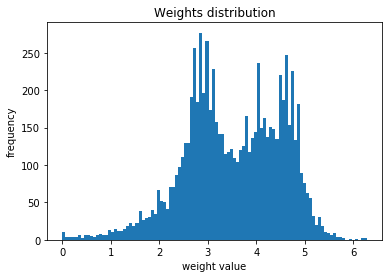

In [21]:
plt.hist(w.flatten(), bins=100)
plt.xlabel('weight value')
plt.ylabel('frequency')
plt.title('Weights distribution')
plt.show()